Dataset Kaggle : https://www.kaggle.com/datasets/imgowthamg/car-price/data

In [ ]:
'''
Objective :
1. Membuat model prediksi harga mobil
2. Evaluasi performa model
3. Menyimpan model
'''

In [ ]:
'''
Business Problem (SMART Framework):
1. Specific: Mengetahui harga mobil dengan akurasi tinggi
2. Measurable: Mengurangi beban pengiriman sebesar 15% dalam 6 bulan
3. Achievable: Meningkatkan penjualan mobil sebesar 10% dalam 1 tahun
4. Relevant: Memastikan harga mobil sesuai dengan pasar untuk meningkatkan daya saing
5. Time-bound: Mencapai target dalam 1 tahun
'''

# Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.mstats import winsorize

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [5]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


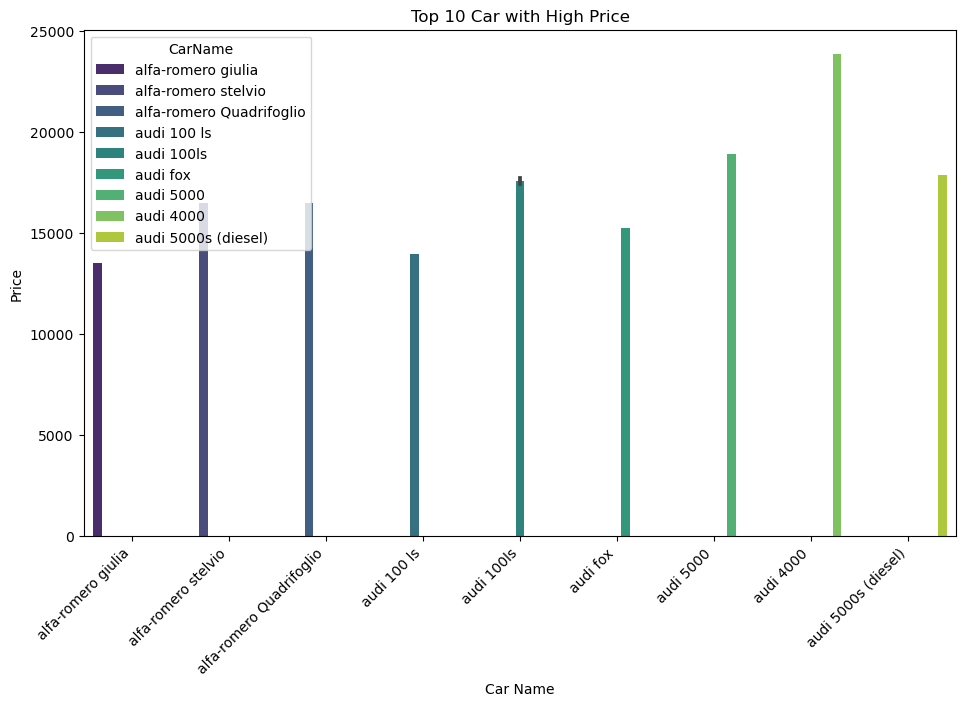

In [10]:
high_price_car = data.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=data.head(10), x='CarName', y='price', hue='CarName', palette='viridis')
plt.xlabel('Car Name')
plt.ylabel('Price')
plt.title('Top 10 Car with High Price')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Pada seluruh data penjualan mobil, terdapat 10 harga mobil tertinggi pada visualisasi. Harga mobil tertinggi yaitu Audi 4000 sebesar >20000 US Dollar.

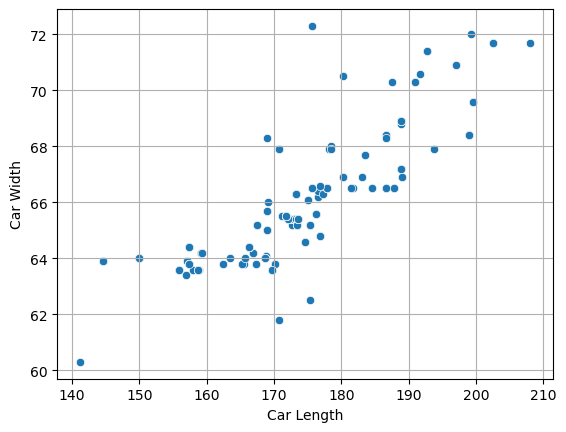

In [11]:
sns.scatterplot(data=data, x='carlength', y='carwidth')

plt.xlabel('Car Length')
plt.ylabel('Car Width')
plt.grid(True)
plt.show()

Untuk visualisi scatter plot pada panjang dan lebar mobil, menunjukkan bahwa terdapat sedikit korelasi antara keduanya dengan melihat kepadatan data di beberapa titik.

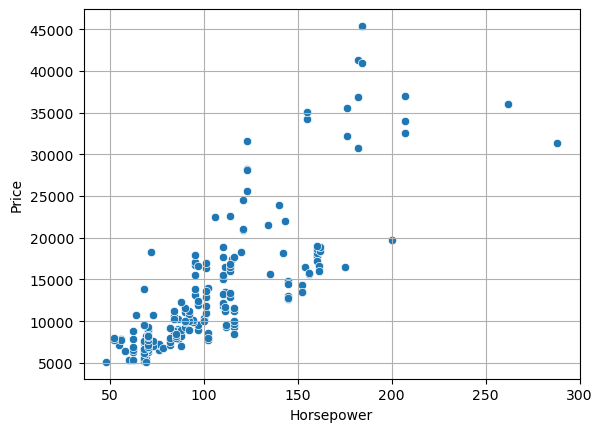

In [12]:
sns.scatterplot(data=data, x='horsepower', y='price')

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Untuk visualisi scatter plot pada horsepower dan harga mobil, menunjukkan bahwa terdapat korelasi antara keduanya dengan melihat kepadatan data di banyak titik.

In [13]:
data_clean = data.drop(columns=['car_ID','symboling'])

In [14]:
num_feat = data_clean.select_dtypes(include=['float64', 'int64'])
cat_feat = data_clean.select_dtypes(exclude=['float64', 'int64'])

In [15]:
num_feat.drop(columns='price', inplace=True)

In [16]:
num_feat.skew()

wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
dtype: float64

# Outlier of numerical features

In [17]:
q1 = num_feat.quantile(0.25)
q3 = num_feat.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outlier = ((num_feat < low_bound) | (num_feat > up_bound)).sum()
outlier

wheelbase            3
carlength            1
carwidth             8
carheight            0
curbweight           0
enginesize          10
boreratio            0
stroke              20
compressionratio    28
horsepower           6
peakrpm              2
citympg              2
highwaympg           3
dtype: int64

Outlier terbanyak yaitu compressionratio.

# Box Plot of Price

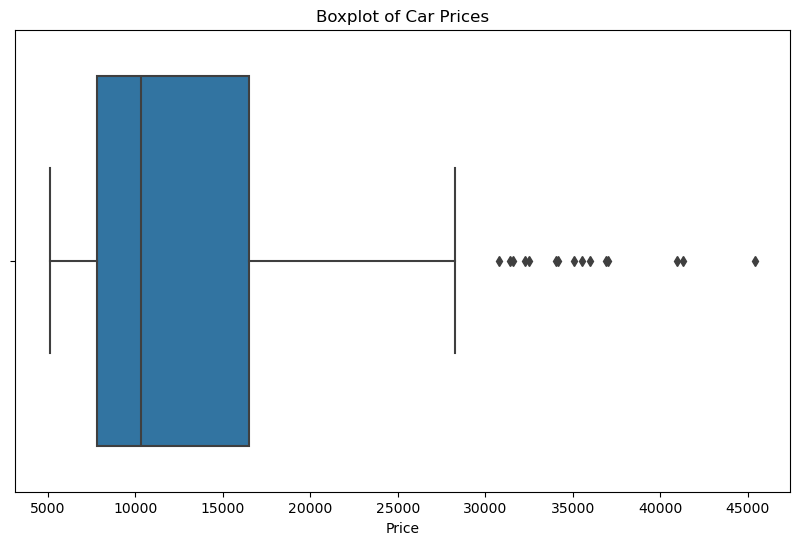

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_clean['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

Price ini akan menjadi target. Untuk itu dilihat terlebih dahulu apakah distribusi harga mobil normal atau terdapat banyak outlier. Maka, terlihat pada visualisasi box plot di atas menunjukkan bahwa outlier banyak terdapat di luar batas kanan yang artinya data harga mobil memiliki distribusi dengan skewness positif.

# Box Plot of Numerical Features

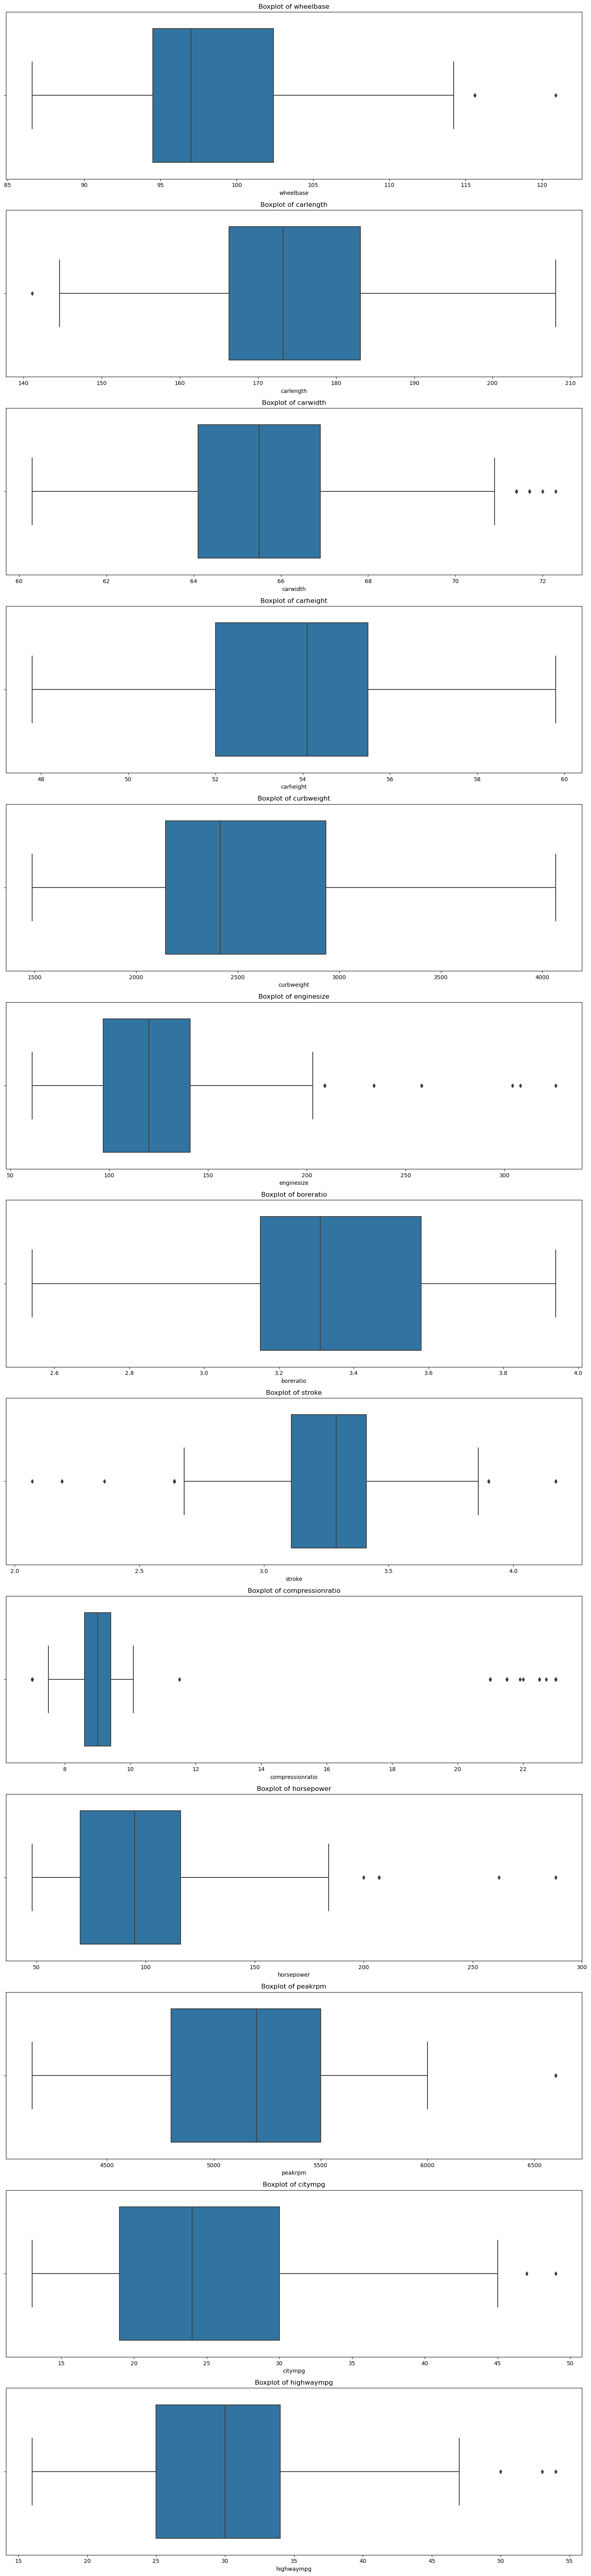

In [19]:
if num_feat is not None and not num_feat.empty:
    # Create boxplots for each numerical feature
    num_columns = num_feat.columns
    num_features = len(num_columns)
    
    plt.figure(figsize=(15, 5 * num_features))
    
    for i, column in enumerate(num_columns, 1):
        plt.subplot(num_features, 1, i)
        sns.boxplot(x=num_feat[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame 'num_feat' is not initialized properly or is empty.")

Pada keseluruhan fitur numerik, yang memiliki banyak outlier berdasarkan box plot di atas adalah carwidth, enginesize, stroke, compressionratio, dan horsepower.

# Heatmap of Numerical Features

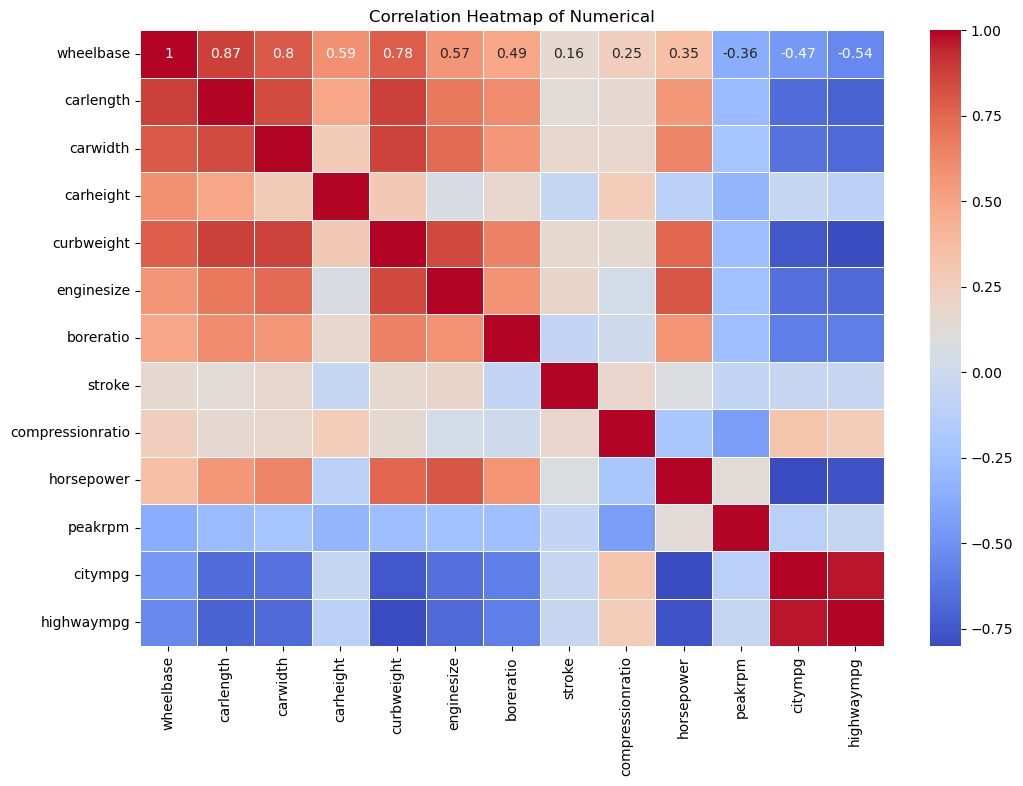

In [20]:
if num_feat is not None and not num_feat.empty:
    # Calculate the correlation matrix
    corr_matrix = num_feat.corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical')
    plt.show()
else:
    print("DataFrame 'num_feat' is not initialized properly or is empty.")

# Correlation between numerical features and price

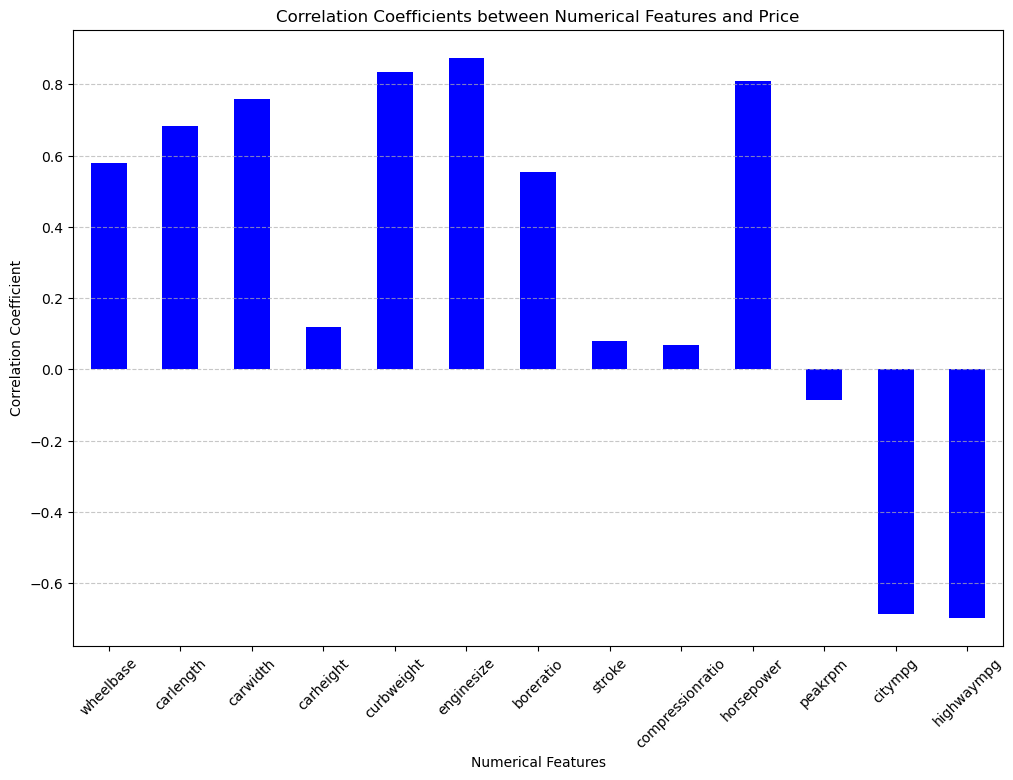

In [21]:
if num_feat is not None and not num_feat.empty and 'price' in data_clean.columns:
    # Calculate the correlation matrix
    corr_matrix = num_feat.corrwith(data_clean['price'])

    # Create a bar plot of the correlation coefficients
    plt.figure(figsize=(12, 8))
    corr_matrix.plot(kind='bar', color='blue')
    plt.title('Correlation Coefficients between Numerical Features and Price')
    plt.xlabel('Numerical Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("DataFrame 'num_feat' is not initialized properly or 'price' column is missing.")

In [22]:
# Assuming cat_feat and data_clean are properly defined

# Ensure cat_feat and data_clean are properly initialized
if cat_feat is not None and not cat_feat.empty and 'price' in data_clean.columns:
    for column in cat_feat.columns:
        model = ols(f'price ~ C({column})', data=data_clean).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f"ANOVA results for {column}:")
        print(anova_table)
        print()
else:
    print("DataFrame 'cat_feat' or 'data_clean' is not initialized properly or 'price' column is missing.")

ANOVA results for CarName:
                  sum_sq     df         F        PR(>F)
C(CarName)  1.243317e+10  146.0  8.421908  6.414987e-16
Residual    5.864709e+08   58.0       NaN           NaN

ANOVA results for fueltype:
                   sum_sq     df         F    PR(>F)
C(fueltype)  1.454053e+08    1.0  2.292741  0.131536
Residual     1.287423e+10  203.0       NaN       NaN

ANOVA results for aspiration:
                     sum_sq     df         F  PR(>F)
C(aspiration)  4.121724e+08    1.0  6.636622  0.0107
Residual       1.260747e+10  203.0       NaN     NaN

ANOVA results for doornumber:
                     sum_sq     df         F    PR(>F)
C(doornumber)  1.319520e+07    1.0  0.205946  0.650448
Residual       1.300644e+10  203.0       NaN       NaN

ANOVA results for carbody:
                  sum_sq     df         F    PR(>F)
C(carbody)  1.801997e+09    4.0  8.031976  0.000005
Residual    1.121764e+10  200.0       NaN       NaN

ANOVA results for drivewheel:
                

Berdasarkan Anova testing di atas, fitur kategorikal yang tidak terdapat perbedaan pada target (price) yaitu fitur 'CarName', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', dan 'fuelsystem'.

# Feature Engineering

In [23]:
X = data_clean.drop('price', axis=1)
y = data_clean['price']

Mendefinisikan X dan y untuk melakukan feature engineering lebih lanjut. Di sini X adalah fitur-fitur yang digunakan untuk membuat model prediksi harga mobil dan y adalah target yang ingin diprediksi.

In [24]:
# Redefine X
X_new = X[['CarName', 'aspiration', 'carbody', 'drivewheel', 
           'enginelocation', 'wheelbase', 'carlength', 'carwidth', 
           'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
           'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (143, 17)
Test size  :  (62, 17)


Mendefinisikan kembali X yang mana di dalamnya merupakan fitur-fitur yang sudah dipilih sebelumnya karena terdapat hubungan atau korelasi pada target (price). Kemudian dilakukan splitting pada X yang baru dan juga y. Di ambil sebanyak 30% data untuk menjadi data test. Dan train sebanyak 70% dari data.

In [25]:
num_train = X_train[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg', 'highwaympg']]
cat_train = X_train[['CarName', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']]

num_test = X_test[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg', 'highwaympg']]
cat_test = X_test[['CarName', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']]

Memisahkan numerikal dan kategorikal fitur untuk dilakukan transformasi pada data.

# Outlier checking for numerical features of train data

In [26]:
q1 = num_train.quantile(0.25)
q3 = num_train.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outlier = ((num_train < low_bound) | (num_train > up_bound)).sum()
outlier

wheelbase     6
carlength     0
carwidth      7
curbweight    0
enginesize    7
boreratio     1
horsepower    7
citympg       0
highwaympg    0
dtype: int64

# Handling outlier numerical features of train data

In [27]:
for col in num_train:
    num_train.loc[:, col] = winsorize(num_train[col], limits=[0.05, 0.05])

# Outlier checking for numerical features of test data

In [28]:
q1 = num_test.quantile(0.25)
q3 = num_test.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outlier = ((num_test < low_bound) | (num_test > up_bound)).sum()
outlier

wheelbase     1
carlength     3
carwidth      1
curbweight    0
enginesize    1
boreratio     0
horsepower    1
citympg       0
highwaympg    0
dtype: int64

# Handling outlier numerical features of test data

In [29]:
for col in num_test:
    num_test.loc[:, col] = winsorize(num_test[col], limits=[0.05, 0.05])

# Checking the outlier of numerical features of train data after handling

In [30]:
q1 = num_train.quantile(0.25)
q3 = num_train.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outlier = ((num_train < low_bound) | (num_train > up_bound)).sum()
outlier

wheelbase     0
carlength     0
carwidth      0
curbweight    0
enginesize    0
boreratio     0
horsepower    0
citympg       0
highwaympg    0
dtype: int64

# Checking the outlier of numerical features of test data after handling

In [31]:
q1 = num_test.quantile(0.25)
q3 = num_test.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outlier = ((num_test < low_bound) | (num_test > up_bound)).sum()
outlier

wheelbase     0
carlength     0
carwidth      0
curbweight    0
enginesize    0
boreratio     0
horsepower    0
citympg       0
highwaympg    0
dtype: int64

# Categorical features of train data check

In [32]:
for column in cat_train.columns:
    unique_values = cat_train[column].nunique()
    print(f"Unique values for {column} (train): {unique_values}")

Unique values for CarName (train): 110
Unique values for aspiration (train): 2
Unique values for carbody (train): 5
Unique values for drivewheel (train): 3
Unique values for enginelocation (train): 2
Unique values for enginetype (train): 7
Unique values for cylindernumber (train): 6
Unique values for fuelsystem (train): 7


# Categorical features of test data check

In [33]:
for column in cat_test.columns:
    unique_values = cat_test[column].nunique()
    print(f"Unique values for {column} (test): {unique_values}")

Unique values for CarName (test): 58
Unique values for aspiration (test): 2
Unique values for carbody (test): 5
Unique values for drivewheel (test): 3
Unique values for enginelocation (test): 2
Unique values for enginetype (test): 6
Unique values for cylindernumber (test): 6
Unique values for fuelsystem (test): 7


# Frequencies map for categorical features of train data

In [34]:
# Frequency encoding for 'CarName'
frequency_map_train = cat_train['CarName'].value_counts().to_dict()
cat_train['CarName_freq'] = cat_train['CarName'].map(frequency_map_train)

print(cat_train[['CarName', 'CarName_freq']])

              CarName  CarName_freq
177    toyota mark ii             2
75     mercury cougar             1
174  toyota celica gt             1
31   honda civic cvcc             2
12             bmw x1             1
..                ...           ...
106    nissan clipper             1
14             bmw z4             1
92       nissan latio             1
179     toyota corona             4
102       nissan fuga             1

[143 rows x 2 columns]


# Frequencies map for categorical features of test data

In [35]:
# Frequency encoding for 'CarName'
frequency_map_test = cat_test['CarName'].value_counts().to_dict()
cat_test['CarName_freq'] = cat_test['CarName'].map(frequency_map_test)

print(cat_test[['CarName', 'CarName_freq']])

                      CarName  CarName_freq
15                     bmw x4             1
9         audi 5000s (diesel)             1
100              nissan nv200             1
132                  saab 99e             1
68   buick century luxus (sw)             1
..                        ...           ...
56                  mazda glc             2
128            porsche boxter             1
76          mitsubishi mirage             1
144                 subaru r1             1
104              nissan teana             1

[62 rows x 2 columns]


In [36]:
cat_train.drop(columns='CarName', inplace=True)
cat_test.drop(columns='CarName', inplace=True)

In [37]:
cat_train.dtypes

aspiration        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
CarName_freq       int64
dtype: object

In [38]:
cat_train['CarName_freq'] = cat_train['CarName_freq'].astype('object')
cat_test['CarName_freq'] = cat_test['CarName_freq'].astype('object')

In [39]:
cat_train.dtypes

aspiration        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
CarName_freq      object
dtype: object

# Scaling

In [40]:
X_train = pd.concat([num_train, cat_train], axis=1)
X_test = pd.concat([num_test, cat_test], axis=1)

# Define the column transformer for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_train.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_train.columns)
    ])

# Fit and transform the training data
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Get feature names after transformation
num_cols = num_train.columns.tolist()
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_train.columns)
new_columns = num_cols + list(cat_cols)

# Convert transformed data back to DataFrame with correct column names
X_train_trans_df = pd.DataFrame(X_train_trans, columns=new_columns)
X_test_trans_df = pd.DataFrame(X_test_trans, columns=new_columns)

# Verify the shapes
print("Shape of X_train_trans_df:", X_train_trans_df.shape)
print("Shape of X_test_trans_df:", X_test_trans_df.shape)

Shape of X_train_trans_df: (143, 46)
Shape of X_test_trans_df: (62, 46)


# Pipelines

In [41]:
# Define the Pipelines
pipe_linreg = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_reg', LinearRegression())
])

pipe_dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontree_reg', DecisionTreeRegressor(random_state=42))
])

pipe_rfr = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest_reg', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Evaluation

In [42]:
# Function to evaluate models
def evaluate_model(pipe, X_train, X_test, y_train, y_test):
    pipe.fit(X_train, y_train)
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    scores = {
        'Model': pipe.named_steps[pipe.steps[-1][0]].__class__.__name__,
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test),
        'Train R^2': r2_score(y_train, y_pred_train),
        'Test R^2': r2_score(y_test, y_pred_test)
    }
    return scores

# Evaluate models
pipelines = [pipe_linreg, pipe_dtr, pipe_rfr]
results = []

for pipe in pipelines:
    result = evaluate_model(pipe, X_train, X_test, y_train, y_test)
    results.append(result)

# Display results
results_df = pd.DataFrame(results)
print(results_df)

                   Model    Train MAE     Test MAE     Train MSE  \
0       LinearRegression  1508.597117  2118.085832  4.295430e+06   
1  DecisionTreeRegressor    47.552448  2000.836016  7.050717e+04   
2  RandomForestRegressor   599.760829  1508.316341  8.060174e+05   

       Test MSE  Train R^2  Test R^2  
0  9.224051e+06   0.929525  0.866867  
1  8.569498e+06   0.998843  0.876314  
2  4.622239e+06   0.986776  0.933286  


Dari keseluruhan algoritma model yang telah diaplikasikan pada pipeline, terlihat bahwa Random Forest Regressor lebih baik hasilnya untuk dijadikan model pada prediksi harga mobil, karena memiliki nilai R^2 yang lebih tinggi dan MAE yang lebih kecil.

# Hyperparameter Tuning

In [43]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'randomforest_reg__n_estimators': [100, 200, 300],
    'randomforest_reg__max_depth': [None, 10, 20, 30],
    'randomforest_reg__min_samples_split': [2, 5, 10],
    'randomforest_reg__min_samples_leaf': [1, 2, 4],
    'randomforest_reg__bootstrap': [True, False]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipe_rfr, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'randomforest_reg__bootstrap': True, 'randomforest_reg__max_depth': 10, 'randomforest_reg__min_samples_leaf': 1, 'randomforest_reg__min_samples_split': 2, 'randomforest_reg__n_estimators': 300}
MAE: 1477.3954491710654
MSE: 4546497.1494382275
R^2: 0.9343791884899983


Ketika menggunakan tuning pada Random Forest Regressor, nilai evaluasinya lebih baik daripada tidak menggunakan tuning. Artinya model Random Forest Regressor dengan menggunakan tuning akan digunakan untuk prediksi harga mobil.

# Model Training

In [44]:
# Correctly initialize the RandomForestRegressor with the tuned parameters
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
))
])

# Fit the model to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'CarName_freq'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=300))])

In [45]:
# Make predictions using the tuned model
y_pred = pipe.predict(X_test)

# Evaluate the performance of the tuned model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# If you want to see the comparison of actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

Mean Absolute Error (MAE): 1465.8563345168998
Mean Squared Error (MSE): 4464019.770366346
R-squared (R²): 0.9355696066004734
        Actual     Predicted
15   30760.000  34725.703333
9    17859.167  18981.000998
100   9549.000   9060.161765
132  11850.000  13310.857874
68   28248.000  27909.830000
95    7799.000   6409.335611
159   7788.000   7937.404754
162   9258.000   7970.473596
147  10198.000  10379.975869
182   7775.000   8206.774901


Prediksi harga mobil terlihat tidak terlalu jauh terhadap data aktual.

# Model Saving

In [46]:
import joblib

# Save the model to a file
joblib.dump(pipe, 'random_forest_regressor_model.pkl')

['random_forest_regressor_model.pkl']

# Model Predict Evaluation

In [47]:
# Load the model from the file
loaded_model = joblib.load('random_forest_regressor_model.pkl')

# Make predictions using the loaded model
loaded_model_pred = loaded_model.predict(X_test)

# Evaluate the performance of the loaded model
mae_loaded = mean_absolute_error(y_test, loaded_model_pred)
mse_loaded = mean_squared_error(y_test, loaded_model_pred)
r2_loaded = r2_score(y_test, loaded_model_pred)

print(f"Loaded Model Mean Absolute Error (MAE): {mae_loaded}")
print(f"Loaded Model Mean Squared Error (MSE): {mse_loaded}")
print(f"Loaded Model R-squared (R²): {r2_loaded}")

Loaded Model Mean Absolute Error (MAE): 1465.8563345168998
Loaded Model Mean Squared Error (MSE): 4464019.770366346
Loaded Model R-squared (R²): 0.9355696066004734


Conclusion: 
1. Model Random Forest Regressor berhasil dilatih untuk memprediksi harga mobil.
2. Prediksi model cukup dekat dengan harga mobil aktual, menunjukkan kinerja yang baik.
3. Model telah disimpan dan berhasil dimuat kembali, menunjukkan kemampuan untuk menyimpan dan menggunakan kembali model.
4. Metode evaluasi kinerja model yang dimuat (MAE, MSE, R²) konsisten dengan model asli, mengonfirmasi keandalannya.
5. Proyek ini memberikan dasar yang kuat untuk perbaikan dan penyempurnaan lebih lanjut dalam model prediksi harga mobil.